In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("data/stud.csv")

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [12]:
print("categories in 'Gender' variable:",end=" " )
print(df['gender'].unique())

print("categories in 'Race enthencity' variable:",end=" " )
print(df['race_ethnicity'].unique())\

print("categories in 'Parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("categories in 'lunch' variable:",end=" " )
print(df['lunch'].unique())


print("categories in 'Test preparation course' variable:",end=" " )
print(df['test_preparation_course'].unique())

categories in 'Gender' variable: ['female' 'male']
categories in 'Race enthencity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'Parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable: ['standard' 'free/reduced']
categories in 'Test preparation course' variable: ['none' 'completed']


In [13]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features : {}".format(len(num_features),num_features))
print("\nWe have {} categorical features : {}".format(len(cat_features),cat_features))



We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df['total_score'] = df['math_score']+df['reading_score'] +df['writing_score']
df['Average_score'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
writing_full = df[df['writing_score']== 100]['Average_score'].count()
maths_full = df[df['math_score']== 100]['Average_score'].count()
reading_full = df[df['reading_score']== 100]['Average_score'].count()


print(f"the total number students got full marks in writing {writing_full}")
print(f"the total number students got full marks in maths {maths_full}")
print(f"the total number students got full marks in reading  {reading_full}")

the total number students got full marks in writing 14
the total number students got full marks in maths 7
the total number students got full marks in reading  17


In [16]:
writing_failed = df[df['writing_score'] < 35]['Average_score'].count()
maths_failed = df[df['math_score'] <35]['Average_score'].count()
reading_failed = df[df['reading_score']<35]['Average_score'].count()


print(f"the total number students failed in writing {writing_failed}")
print(f"the total number students failed marks in maths {maths_failed}")
print(f"the total number students failed marks in reading  {reading_failed}")

the total number students failed in writing 17
the total number students failed marks in maths 22
the total number students failed marks in reading  15


## Univariant analysis 



Text(0.5, 1.0, 'Reading score by gender')

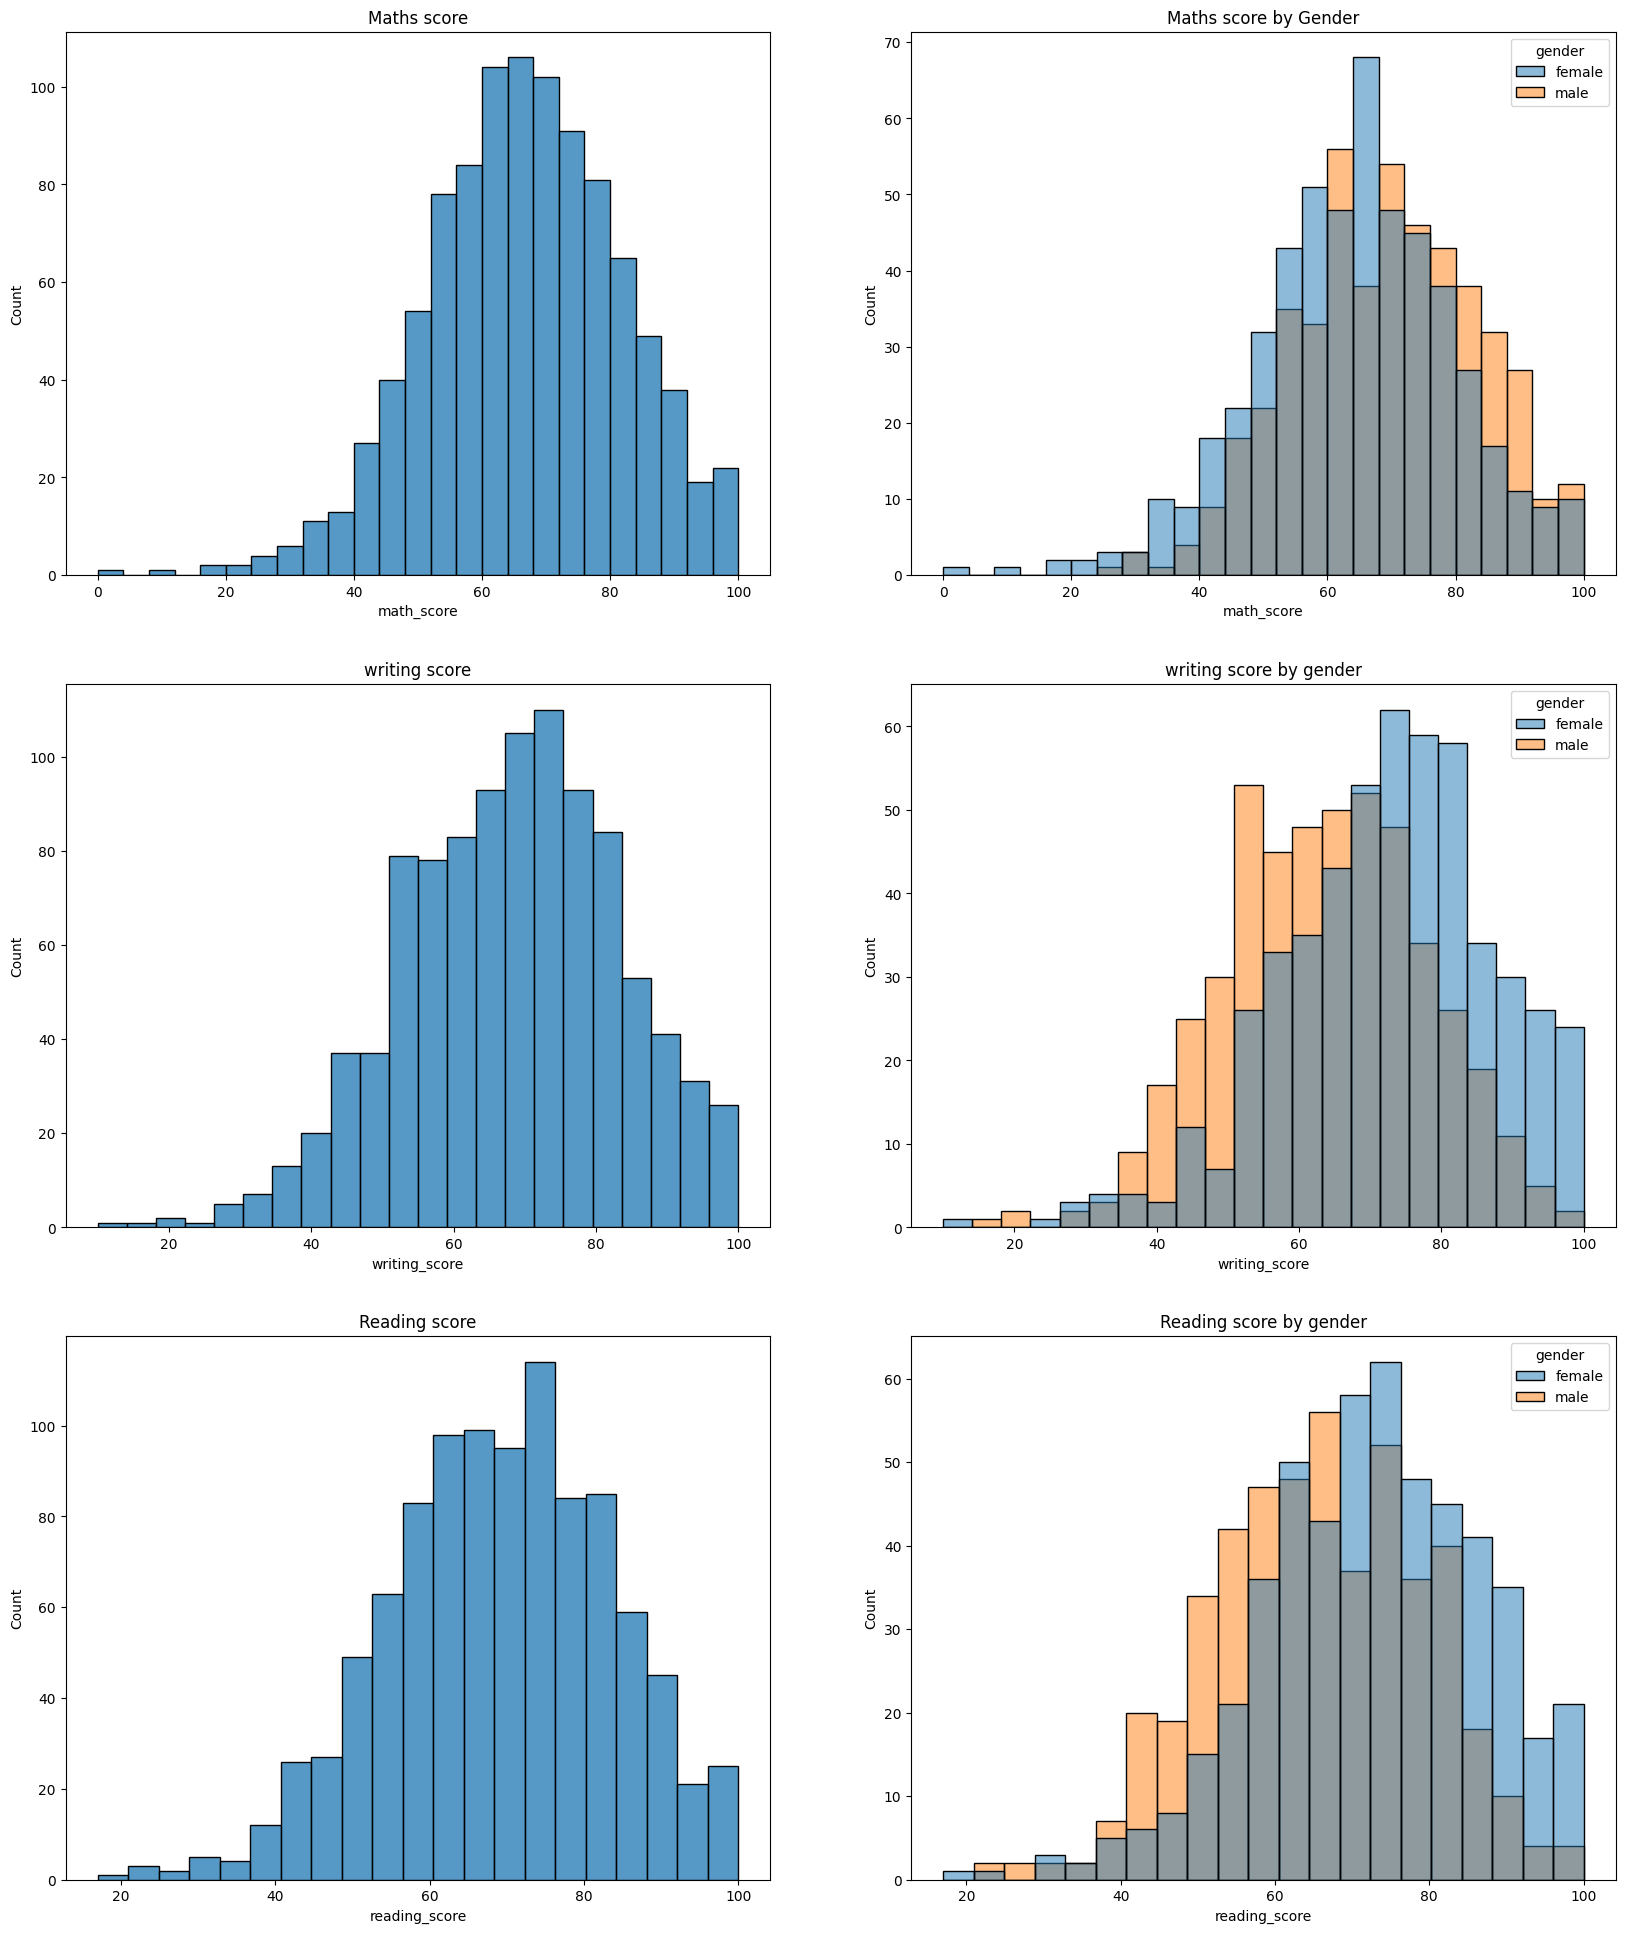

In [17]:
fig ,ax = plt.subplots(3,2,figsize=(20,24))

sns.histplot(data=df,x=df.math_score,ax=ax[0,0])
ax[0,0].set_title('Maths score')

sns.histplot(data=df,x=df.math_score,hue='gender',ax=ax[0,1])
ax[0,1].set_title('Maths score by Gender')


sns.histplot(data=df,x=df.writing_score,ax=ax[1,0])
ax[1,0].set_title('writing score')

sns.histplot(data=df,x=df.writing_score,hue='gender',ax=ax[1,1])
ax[1,1].set_title('writing score by gender')

sns.histplot(data=df,x=df.reading_score,ax=ax[2,0])
ax[2,0].set_title('Reading score')

sns.histplot(data=df,x=df.reading_score,hue='gender',ax=ax[2,1])
ax[2,1].set_title('Reading score by gender')


Text(0.5, 1.0, 'Average score by gender')

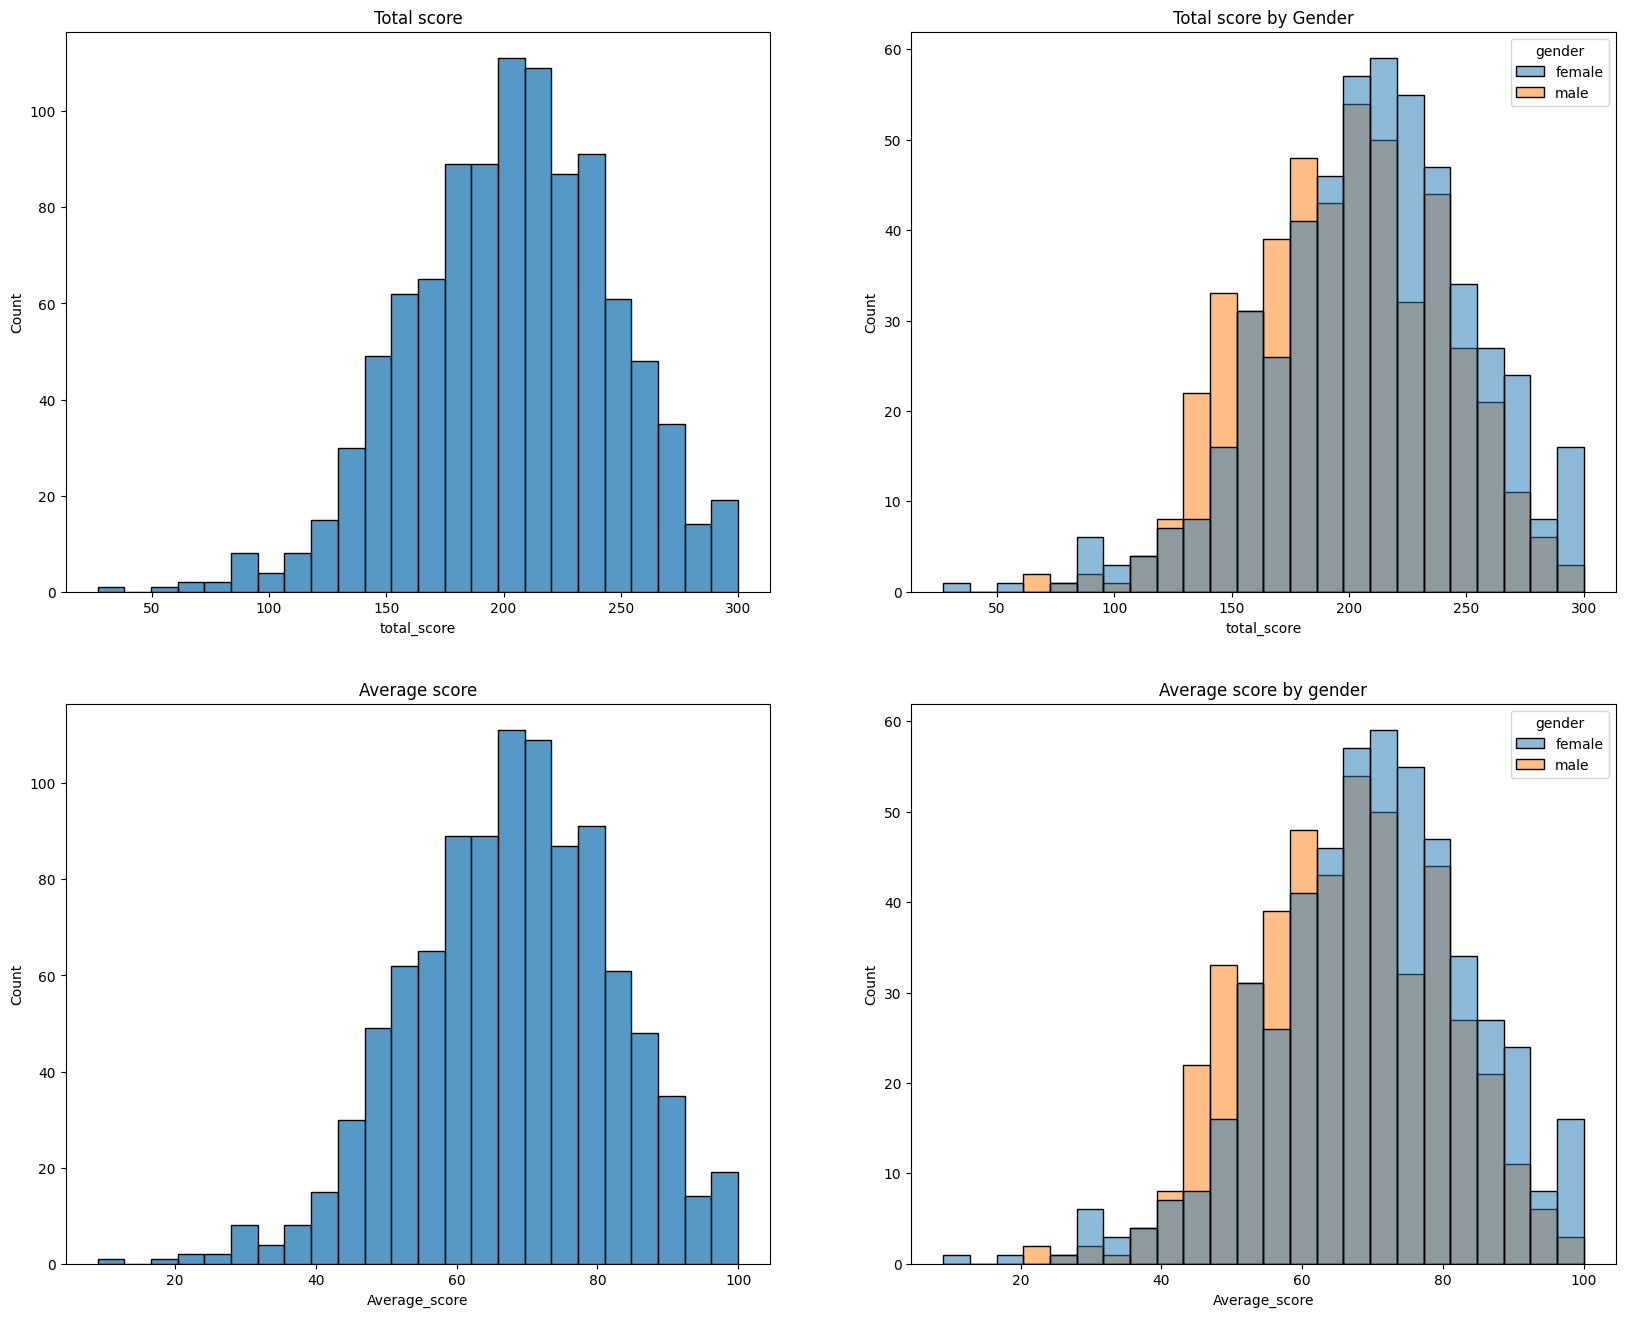

In [18]:
fig ,ax = plt.subplots(2,2,figsize=(20,16))

sns.histplot(data=df,x=df.total_score,ax=ax[0,0])
ax[0,0].set_title('Total score')

sns.histplot(data=df,x=df.total_score,hue='gender',ax=ax[0,1])
ax[0,1].set_title('Total score by Gender')


sns.histplot(data=df,x=df.Average_score,ax=ax[1,0])
ax[1,0].set_title('Average score')

sns.histplot(data=df,x=df.Average_score,hue='gender',ax=ax[1,1])
ax[1,1].set_title('Average score by gender')

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Text(0.5, 1.0, 'Average score by gender')

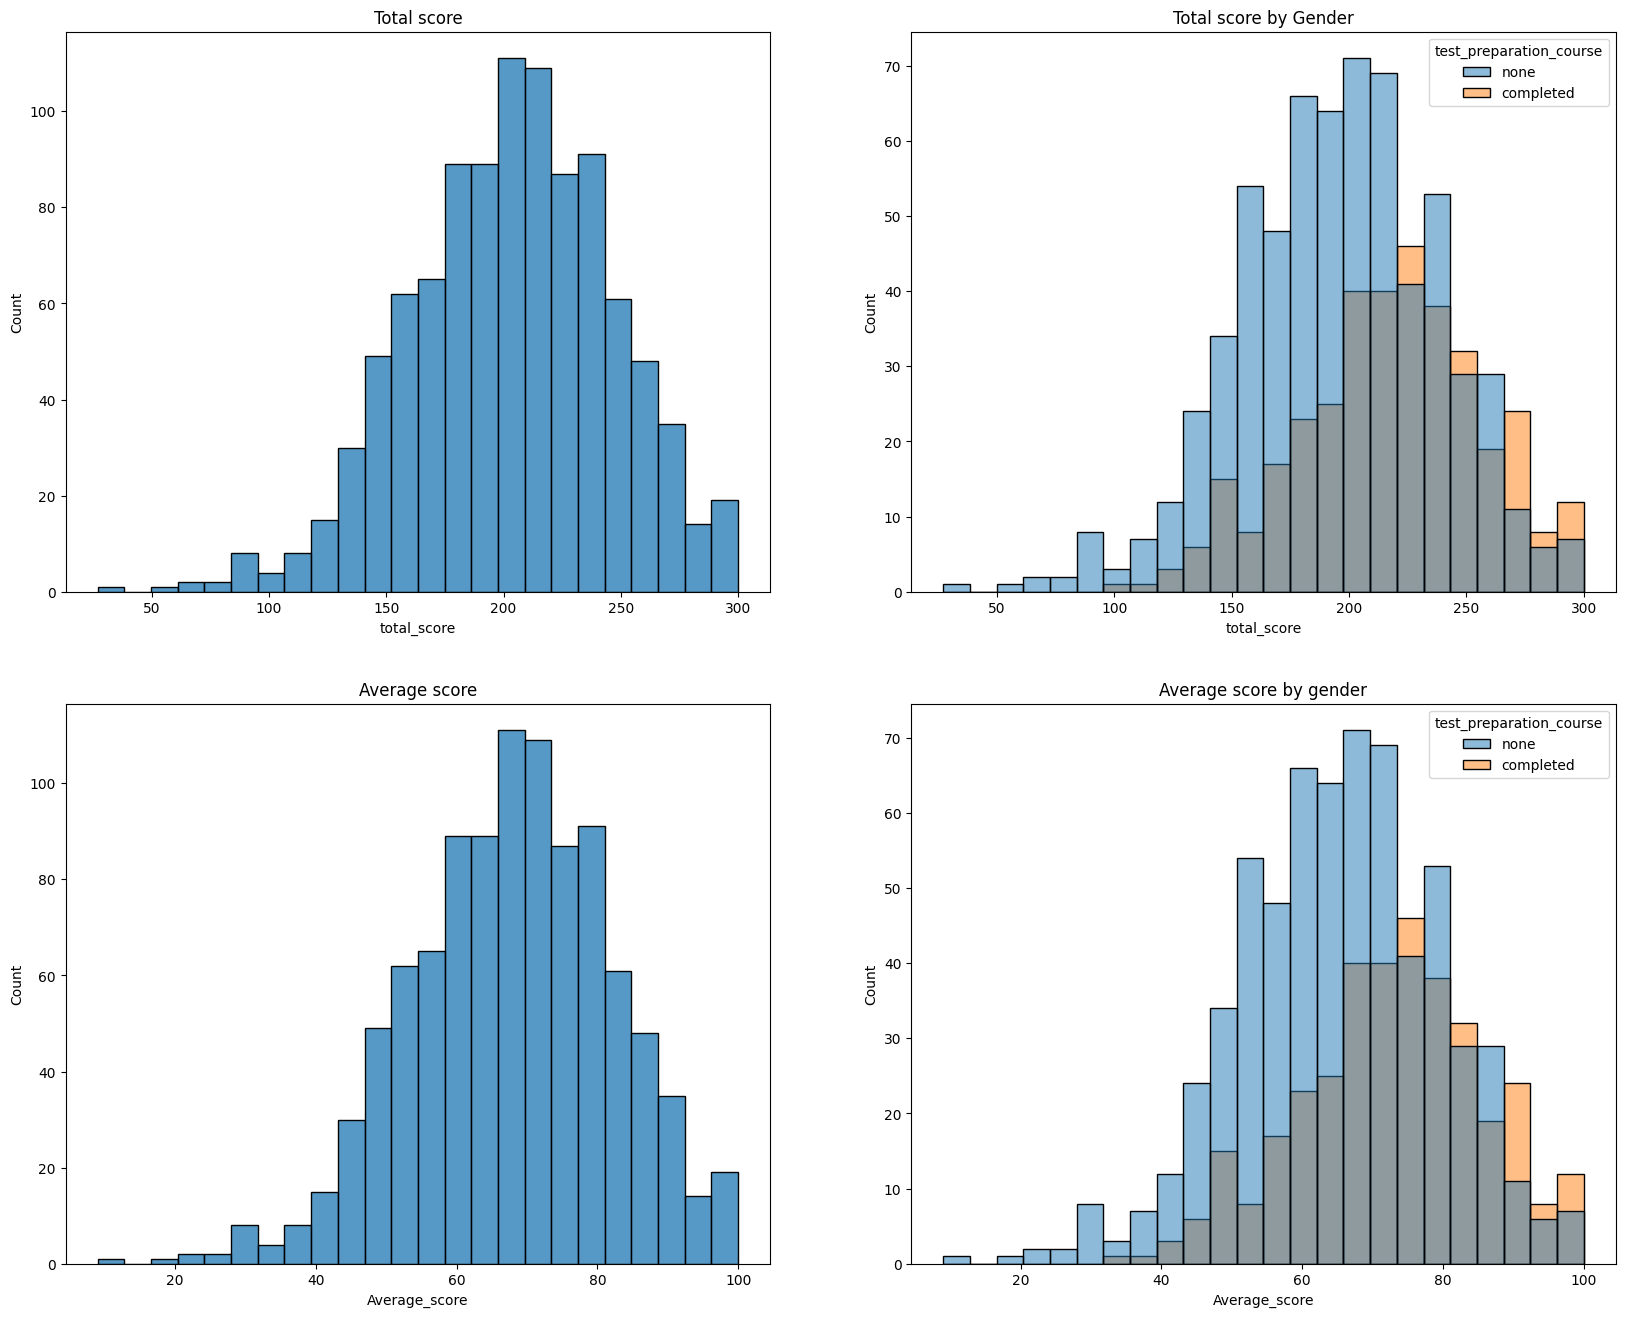

In [20]:
fig ,ax = plt.subplots(2,2,figsize=(20,16))

sns.histplot(data=df,x=df.total_score,ax=ax[0,0])
ax[0,0].set_title('Total score')

sns.histplot(data=df,x=df.total_score,hue='test_preparation_course',ax=ax[0,1])
ax[0,1].set_title('Total score by Gender')


sns.histplot(data=df,x=df.Average_score,ax=ax[1,0])
ax[1,0].set_title('Average score')

sns.histplot(data=df,x=df.Average_score,hue='test_preparation_course',ax=ax[1,1])
ax[1,1].set_title('Average score by gender')

Text(0.5, 1.0, 'Average score by lunch')

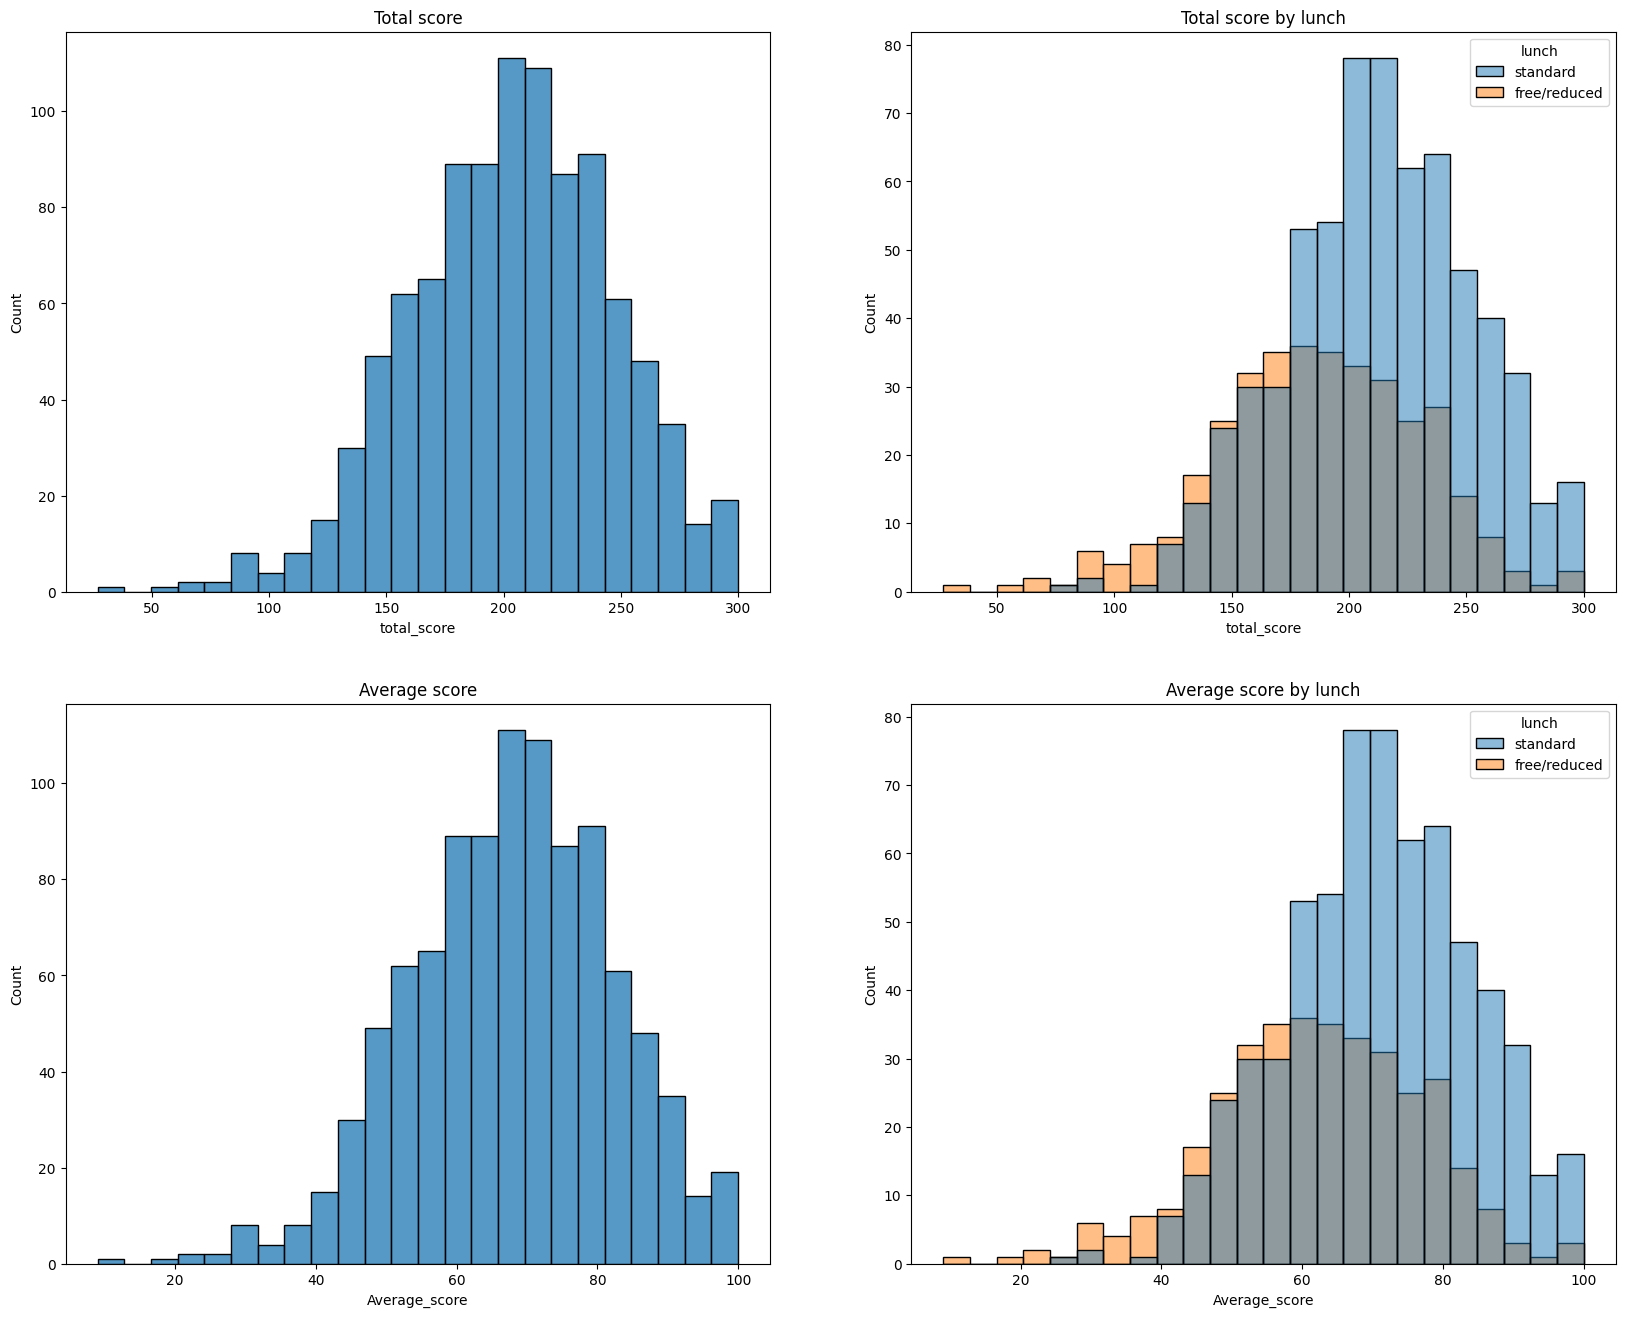

In [21]:
fig ,ax = plt.subplots(2,2,figsize=(20,16))

sns.histplot(data=df,x=df.total_score,ax=ax[0,0])
ax[0,0].set_title('Total score')

sns.histplot(data=df,x=df.total_score,hue='lunch',ax=ax[0,1])
ax[0,1].set_title('Total score by lunch')


sns.histplot(data=df,x=df.Average_score,ax=ax[1,0])
ax[1,0].set_title('Average score')

sns.histplot(data=df,x=df.Average_score,hue='lunch',ax=ax[1,1])
ax[1,1].set_title('Average score by lunch')

In [22]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Text(0.5, 1.0, 'Average score by race_ethnicity for male')

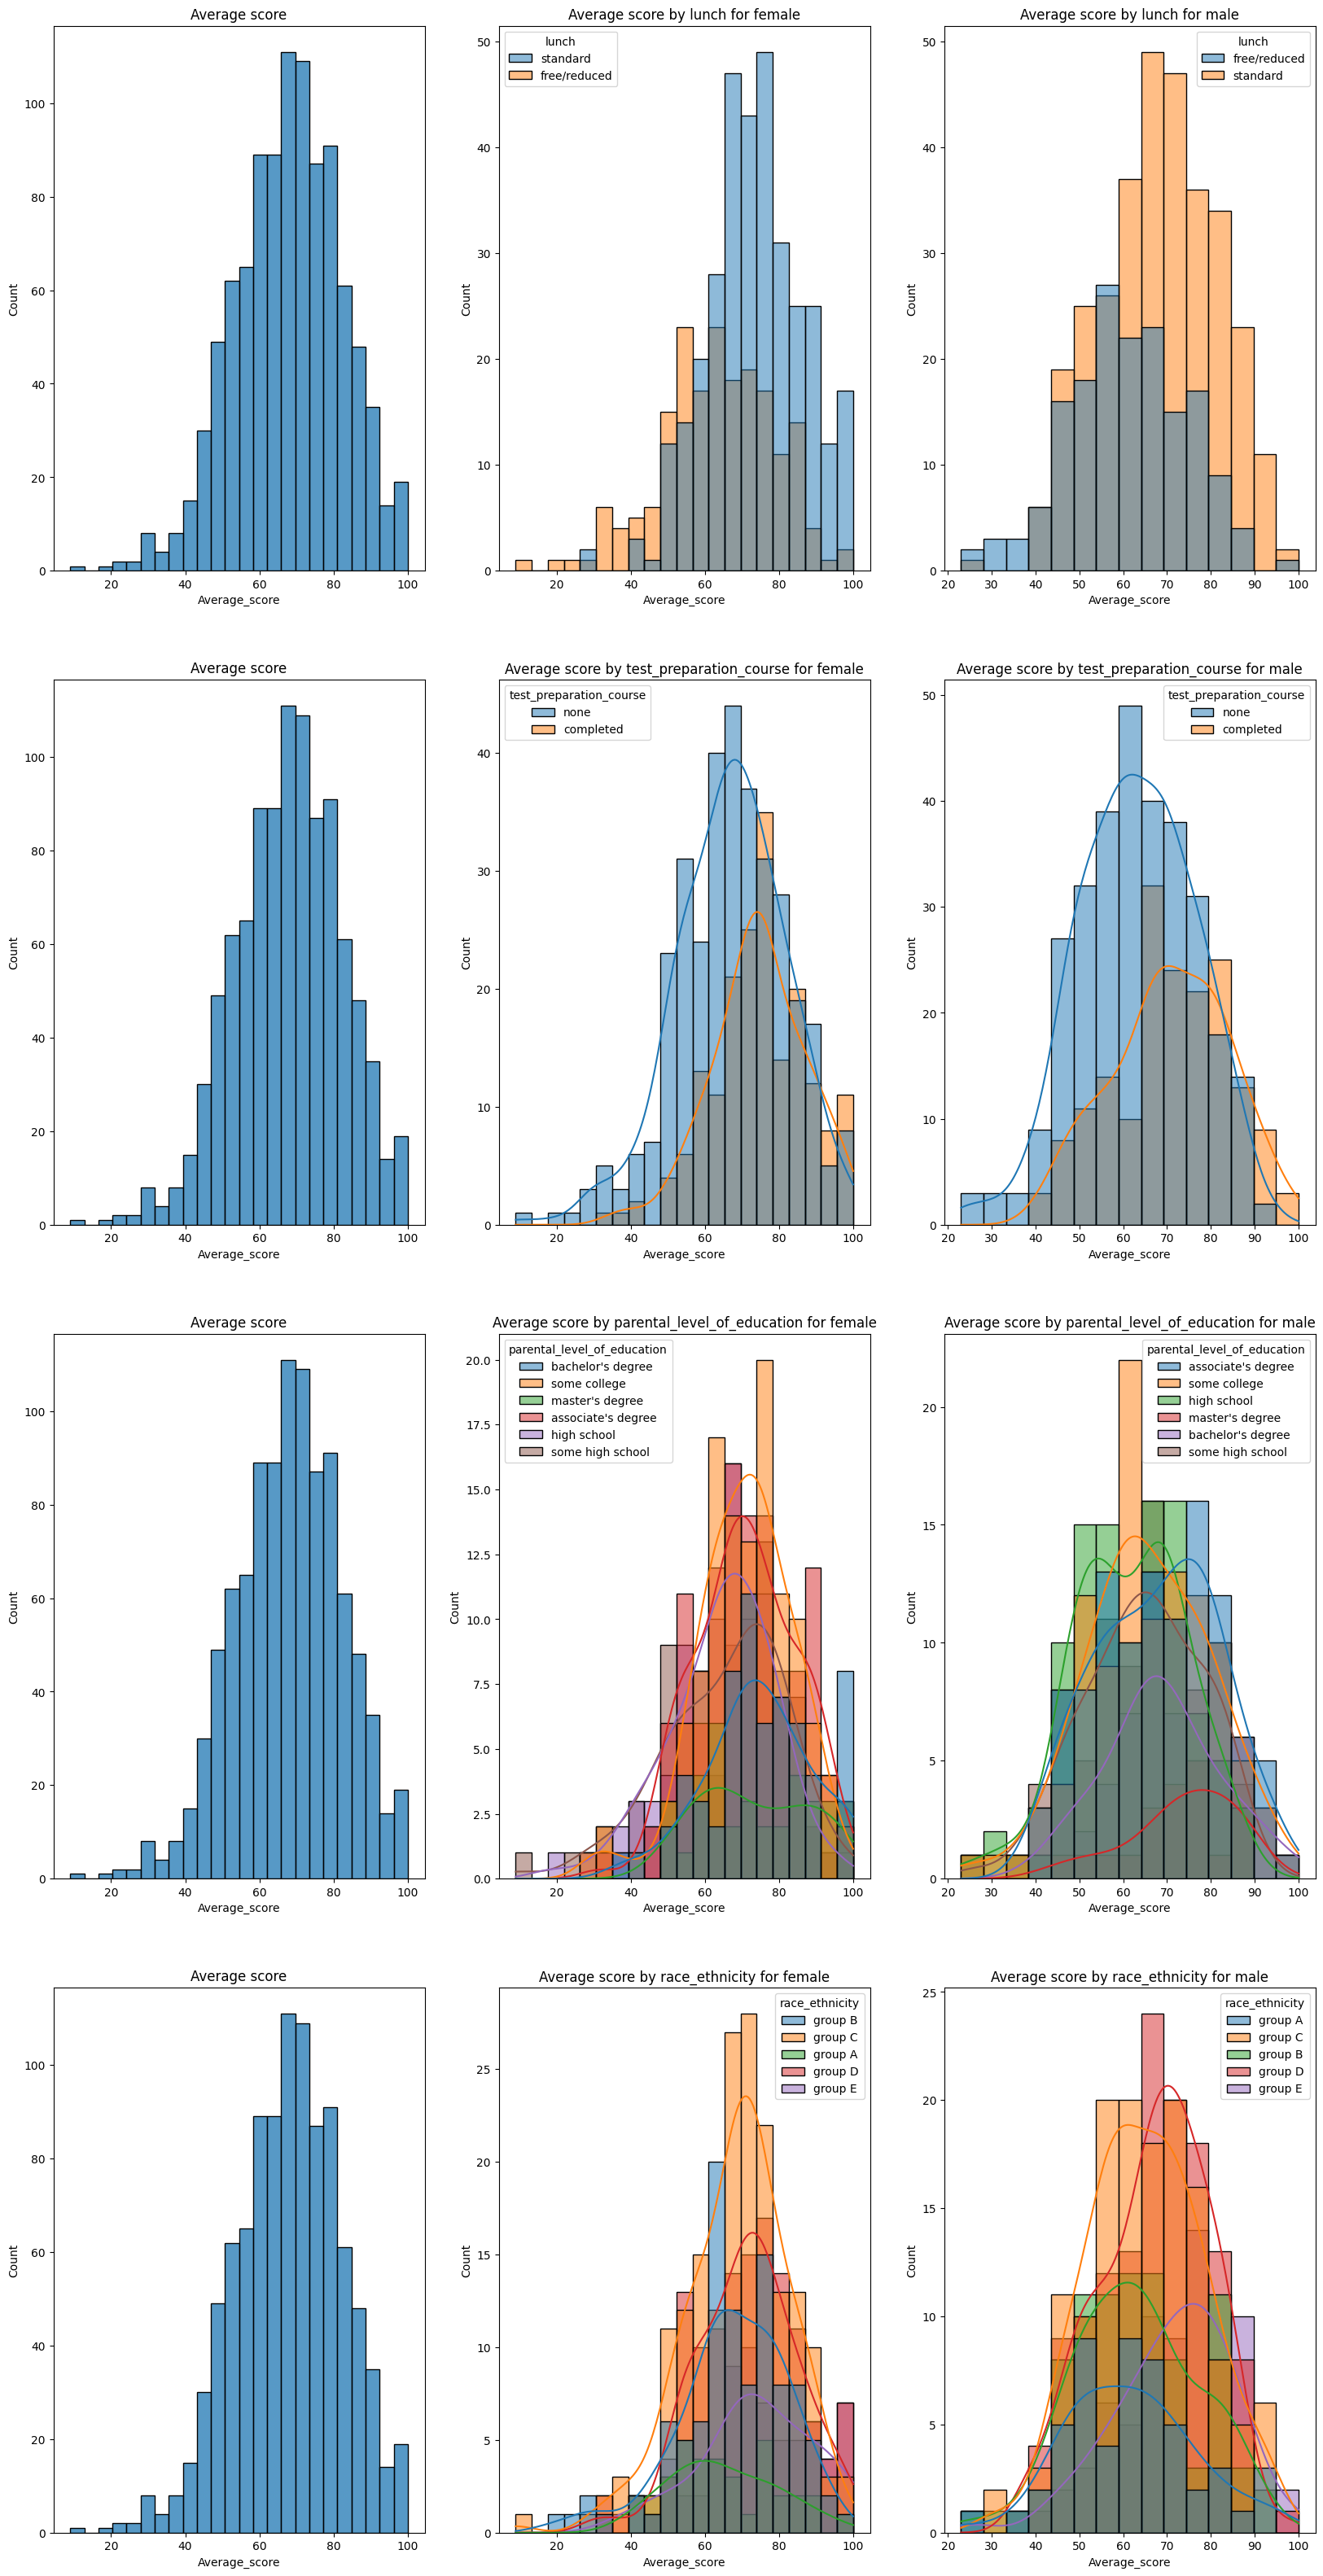

In [23]:
fig ,ax = plt.subplots(4,3,figsize=(20,40))

sns.histplot(data=df,x=df.Average_score,ax=ax[0,0])
ax[0,0].set_title('Average score')

sns.histplot(data=df[df['gender']=='female'],x=df.Average_score,hue='lunch',ax=ax[0,1])
ax[0,1].set_title('Average score by lunch for female')

sns.histplot(data=df[df['gender']=='male'],x=df.Average_score,hue='lunch',ax=ax[0,2])
ax[0,2].set_title('Average score by lunch for male')

sns.histplot(data=df,x=df.Average_score,ax=ax[1,0])
ax[1,0].set_title('Average score')

sns.histplot(data=df[df['gender']=='female'],x=df.Average_score,hue='test_preparation_course',ax=ax[1,1],kde=True)
ax[1,1].set_title('Average score by test_preparation_course for female')

sns.histplot(data=df[df['gender']=='male'],x=df.Average_score,hue='test_preparation_course',ax=ax[1,2],kde=True)
ax[1,2].set_title('Average score by test_preparation_course for male')

sns.histplot(data=df,x=df.Average_score,ax=ax[2,0])
ax[2,0].set_title('Average score')

sns.histplot(data=df[df['gender']=='female'],x=df.Average_score,hue='parental_level_of_education',ax=ax[2,1],kde=True)
ax[2,1].set_title('Average score by parental_level_of_education for female')

sns.histplot(data=df[df['gender']=='male'],x=df.Average_score,hue='parental_level_of_education',ax=ax[2,2],kde=True)
ax[2,2].set_title('Average score by parental_level_of_education for male')

sns.histplot(data=df,x=df.Average_score,ax=ax[3,0])
ax[3,0].set_title('Average score')

sns.histplot(data=df[df['gender']=='female'],x=df.Average_score,hue='race_ethnicity',ax=ax[3,1],kde=True)
ax[3,1].set_title('Average score by race_ethnicity for female')

sns.histplot(data=df[df['gender']=='male'],x=df.Average_score,hue='race_ethnicity',ax=ax[3,2],kde=True)
ax[3,2].set_title('Average score by race_ethnicity for male')





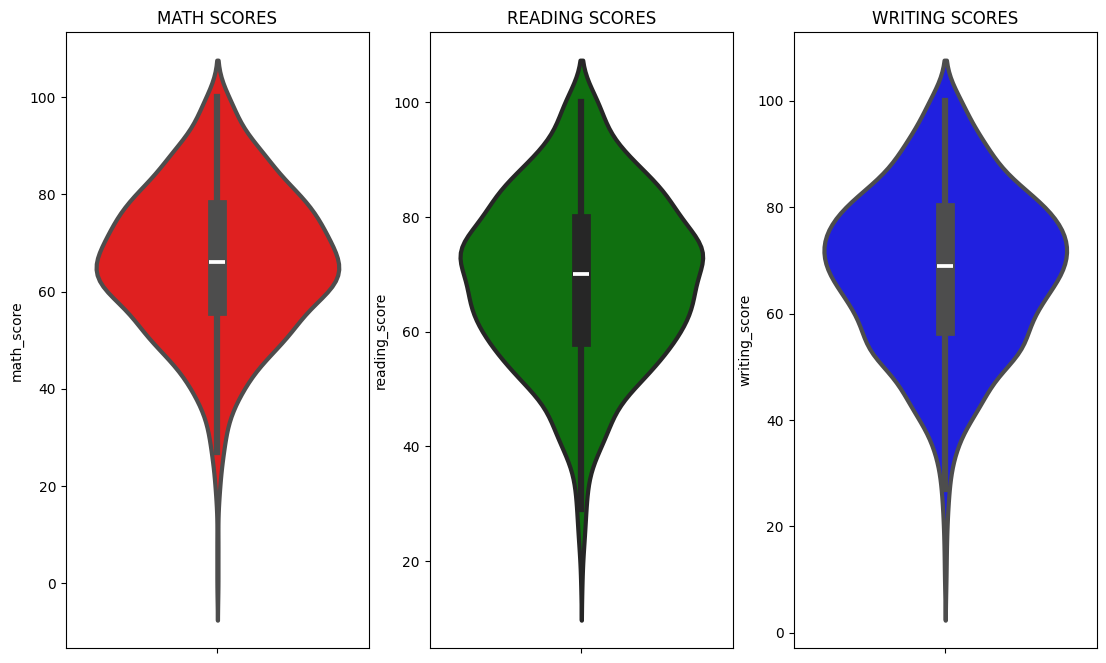

In [24]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

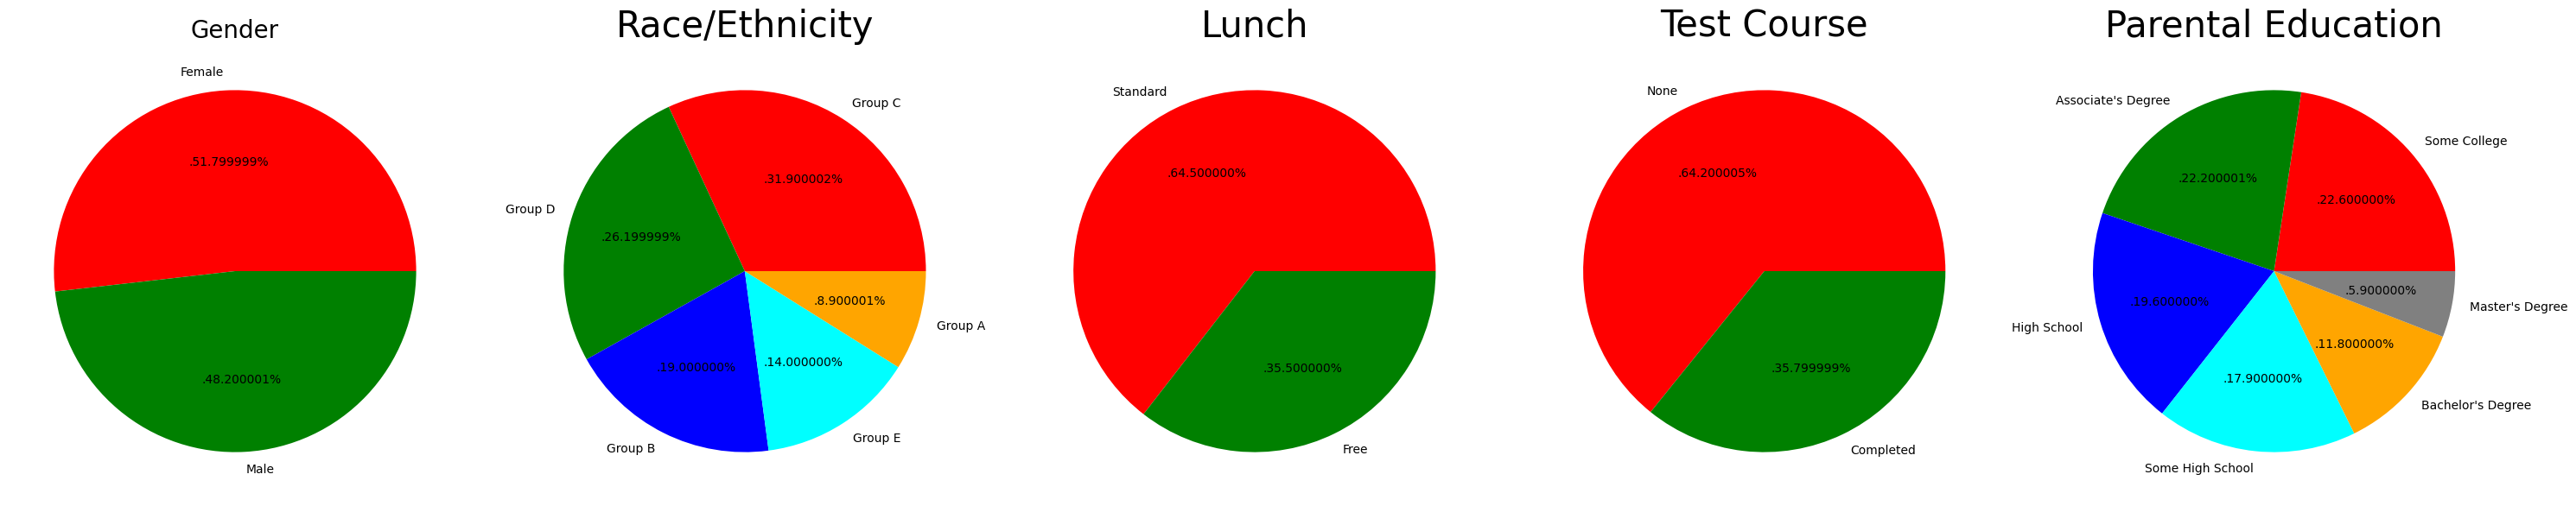

In [25]:
plt.rcParams['figure.figsize'] = (30, 20)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 30)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 30)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 30)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 30)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

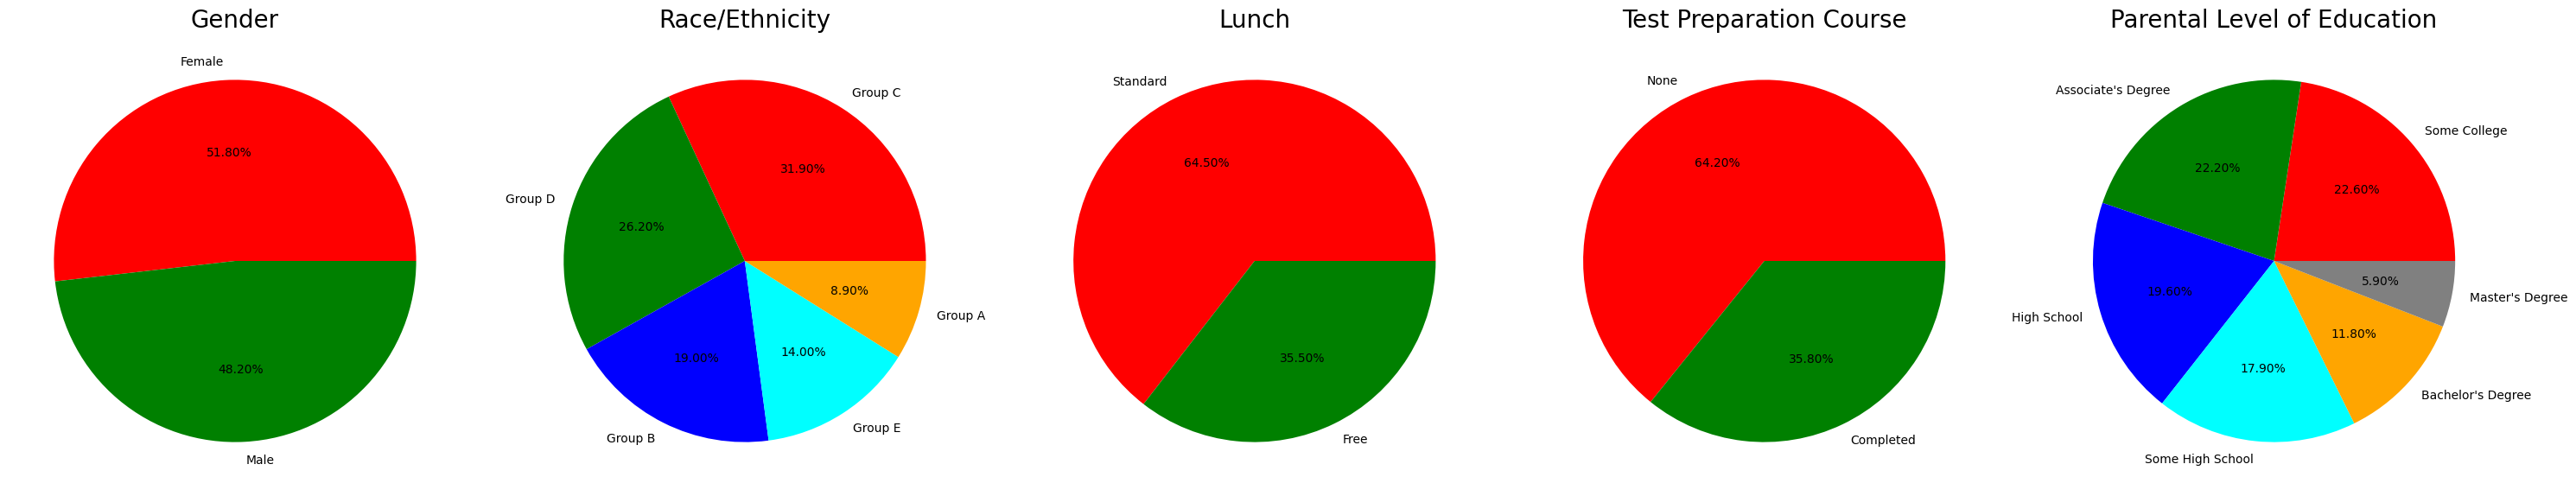

In [26]:
import matplotlib.pyplot as plt

# Setting the figure size globally
plt.rcParams['figure.figsize'] = (30, 20)

# Subplot 1: Gender
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

# Subplot 2: Race/Ethnicity
plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = ['Group C', 'Group D', 'Group B', 'Group E', 'Group A']
colors = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

# Subplot 3: Lunch
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = ['Standard', 'Free']
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Subplot 4: Test Preparation Course
plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = ['None', 'Completed']
colors = ['red', 'green']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Test Preparation Course', fontsize=20)
plt.axis('off')

# Subplot 5: Parental Level of Education
plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = ["Some College", "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"]
colors = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
plt.title('Parental Level of Education', fontsize=20)
plt.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


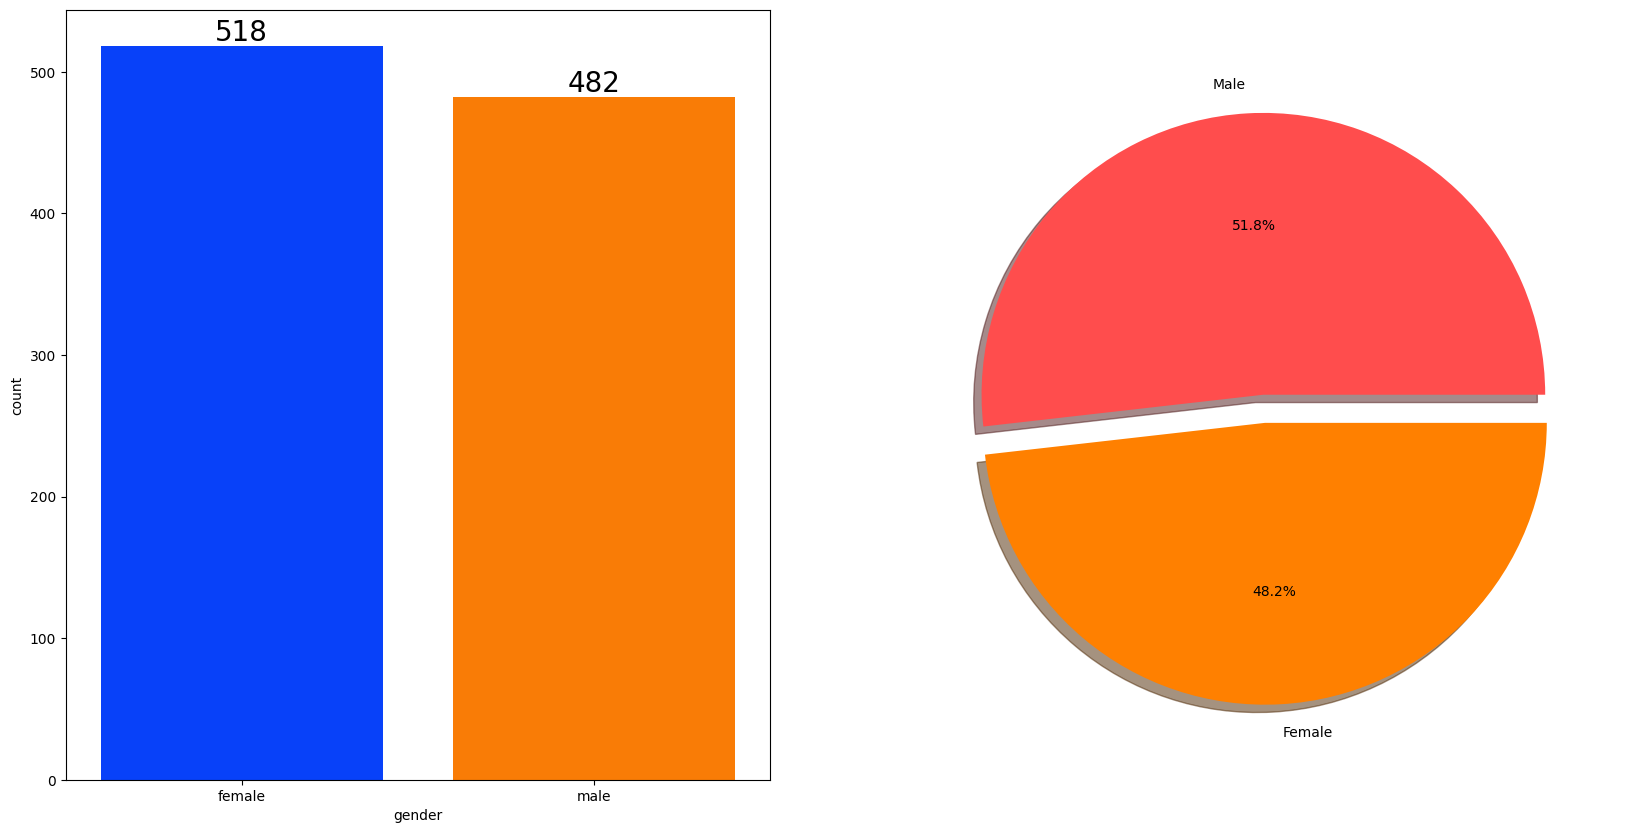

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [28]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total_score,Average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


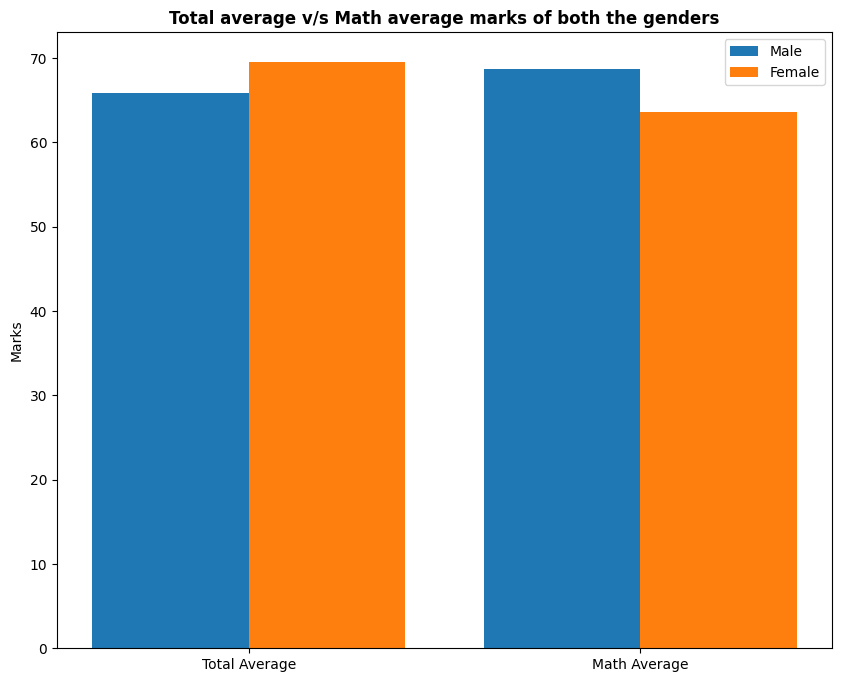

In [29]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['Average_score'][0], gender_group['math_score'][0]]
male_scores = [gender_group['Average_score'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

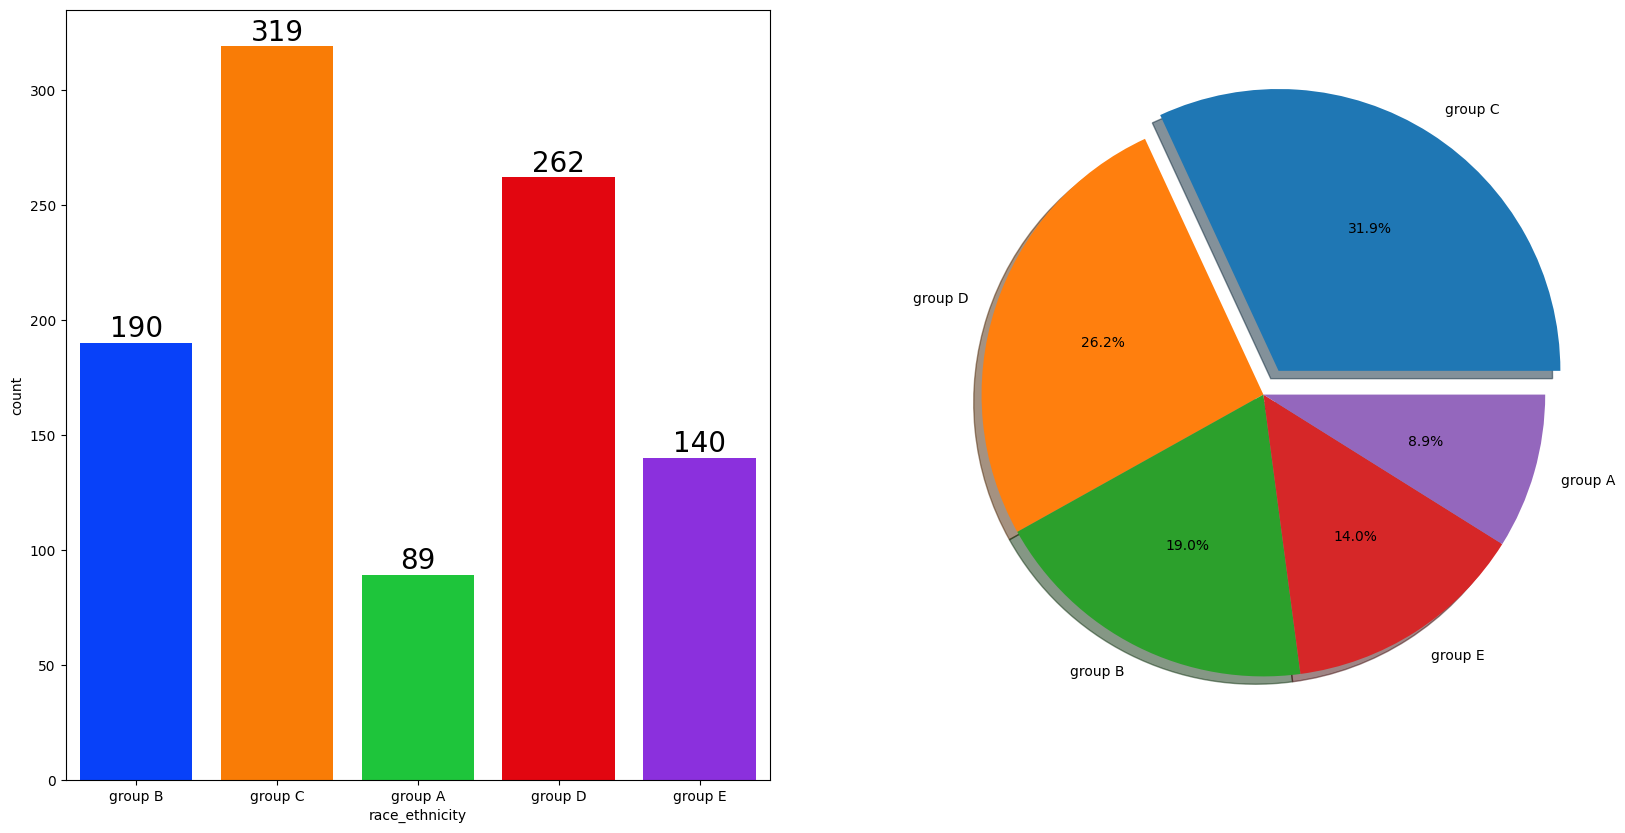

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

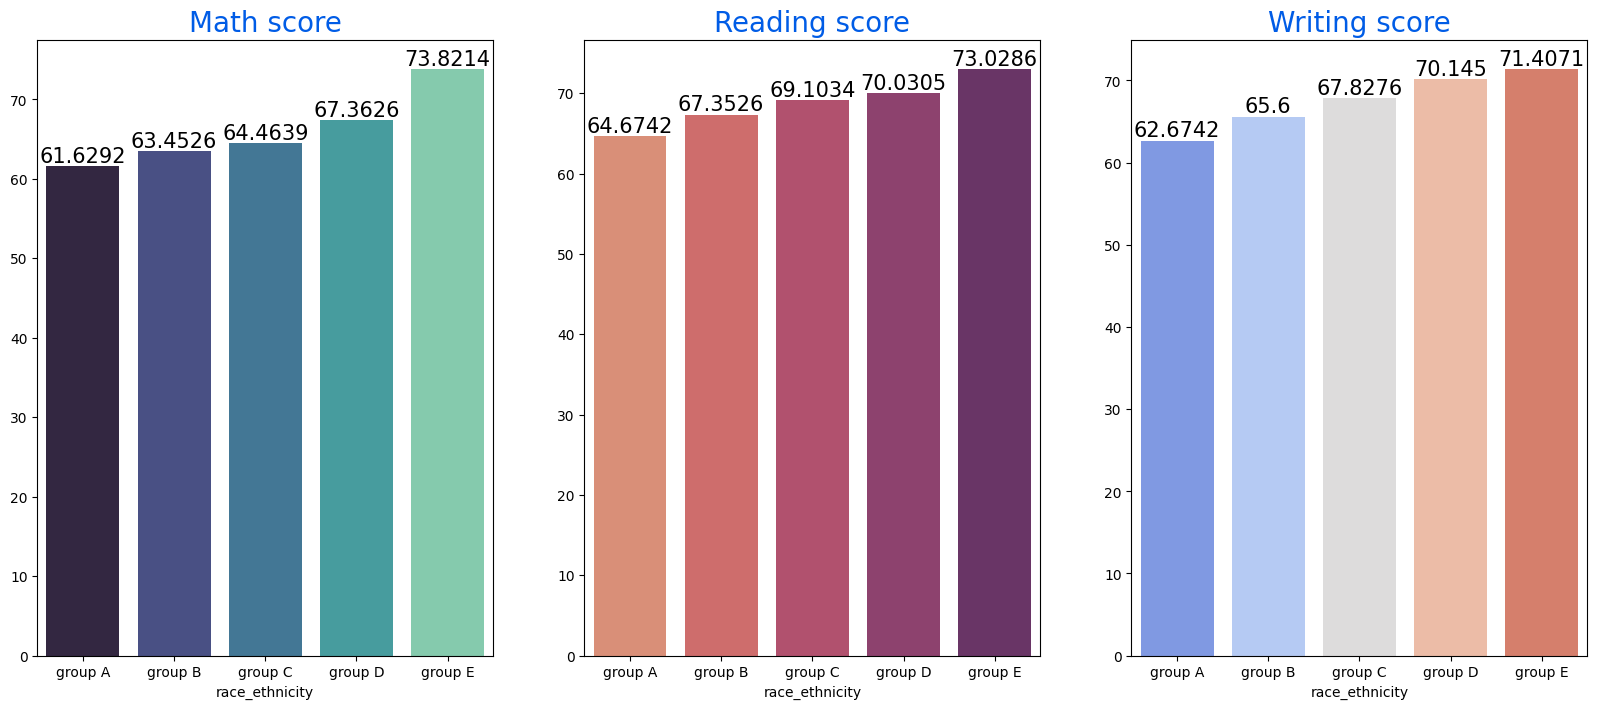

In [31]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

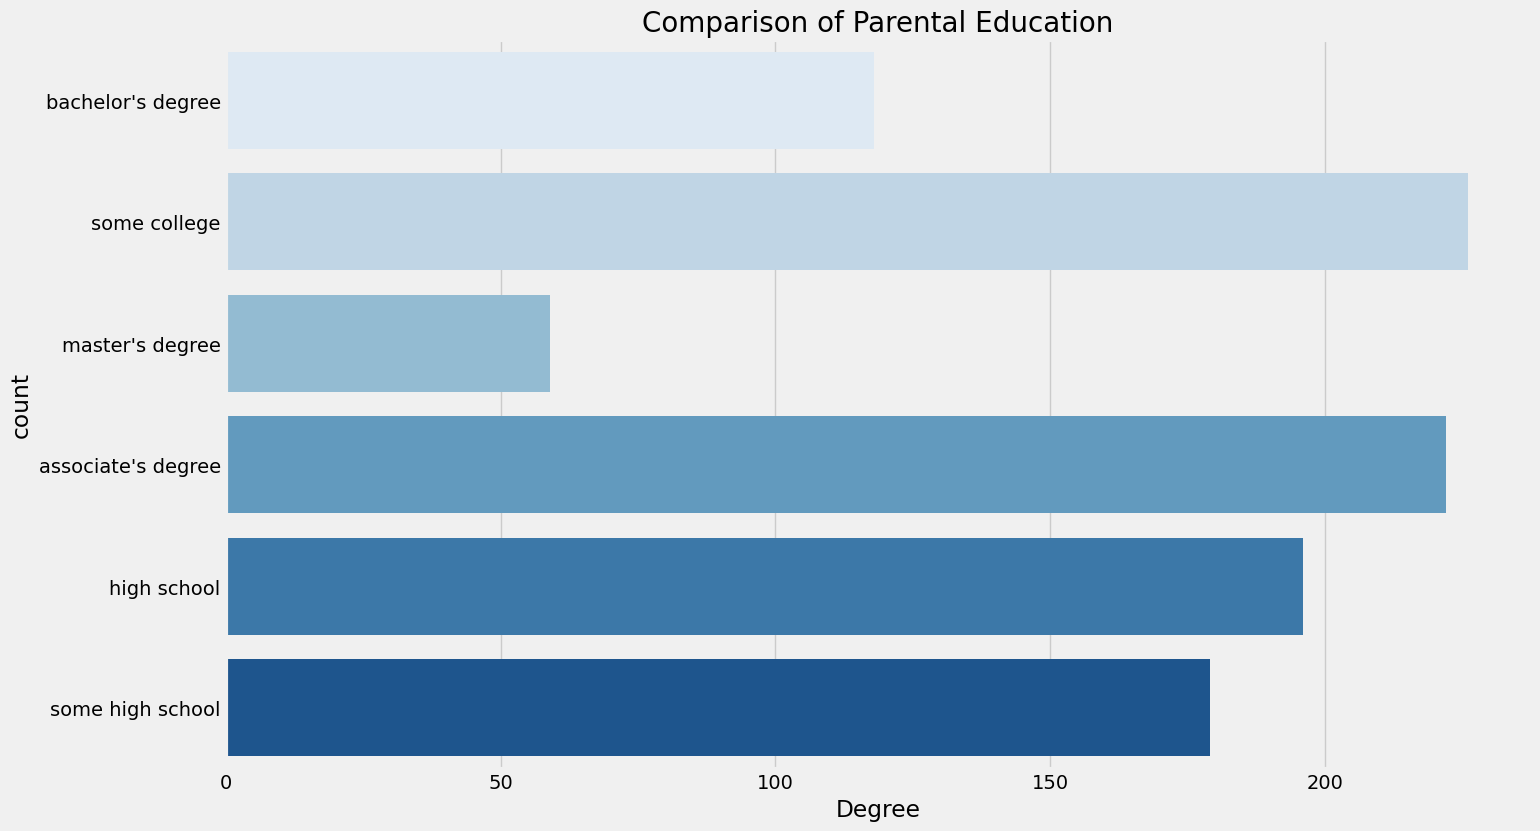

In [32]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

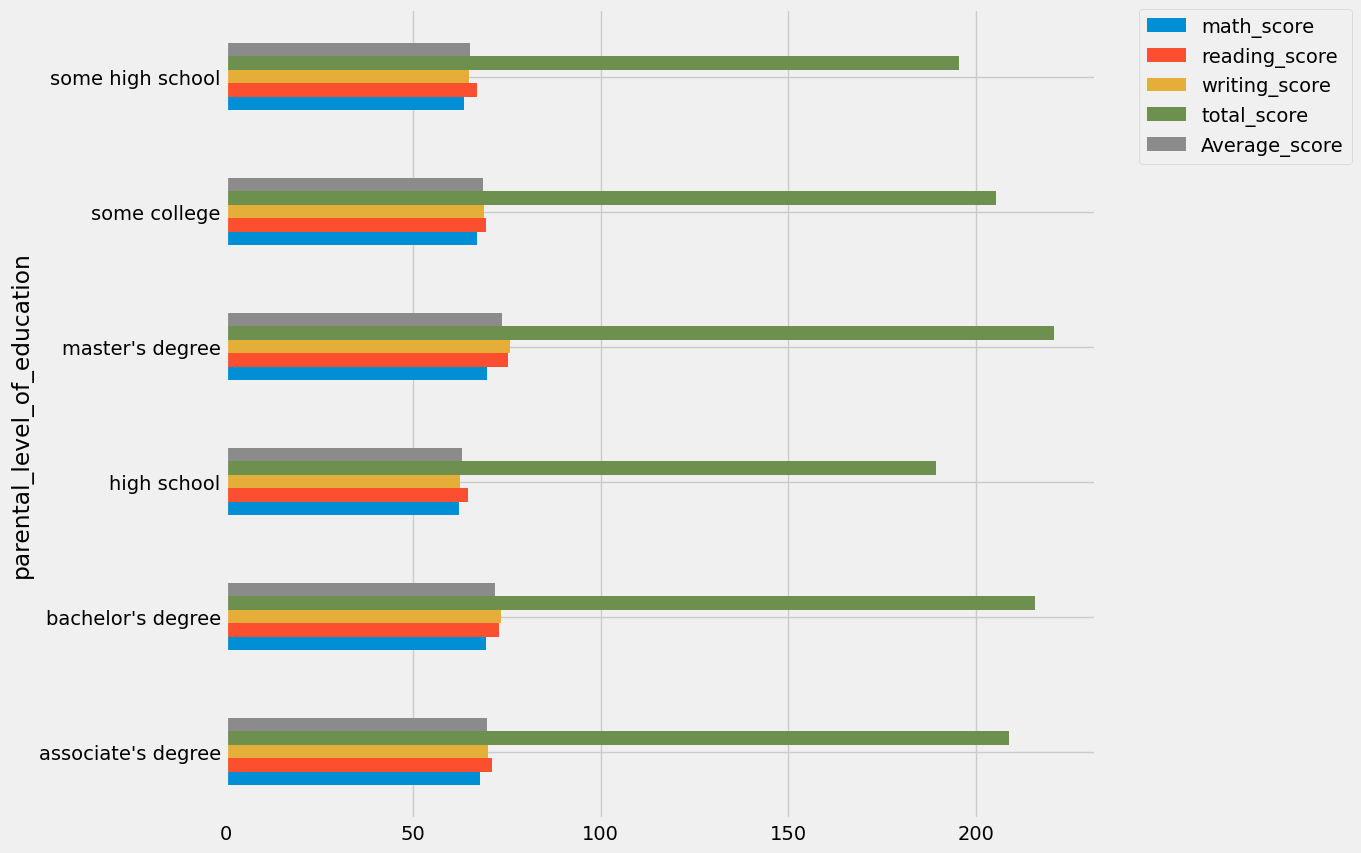

In [36]:
df.groupby('parental_level_of_education').mean(numeric_only=True).plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

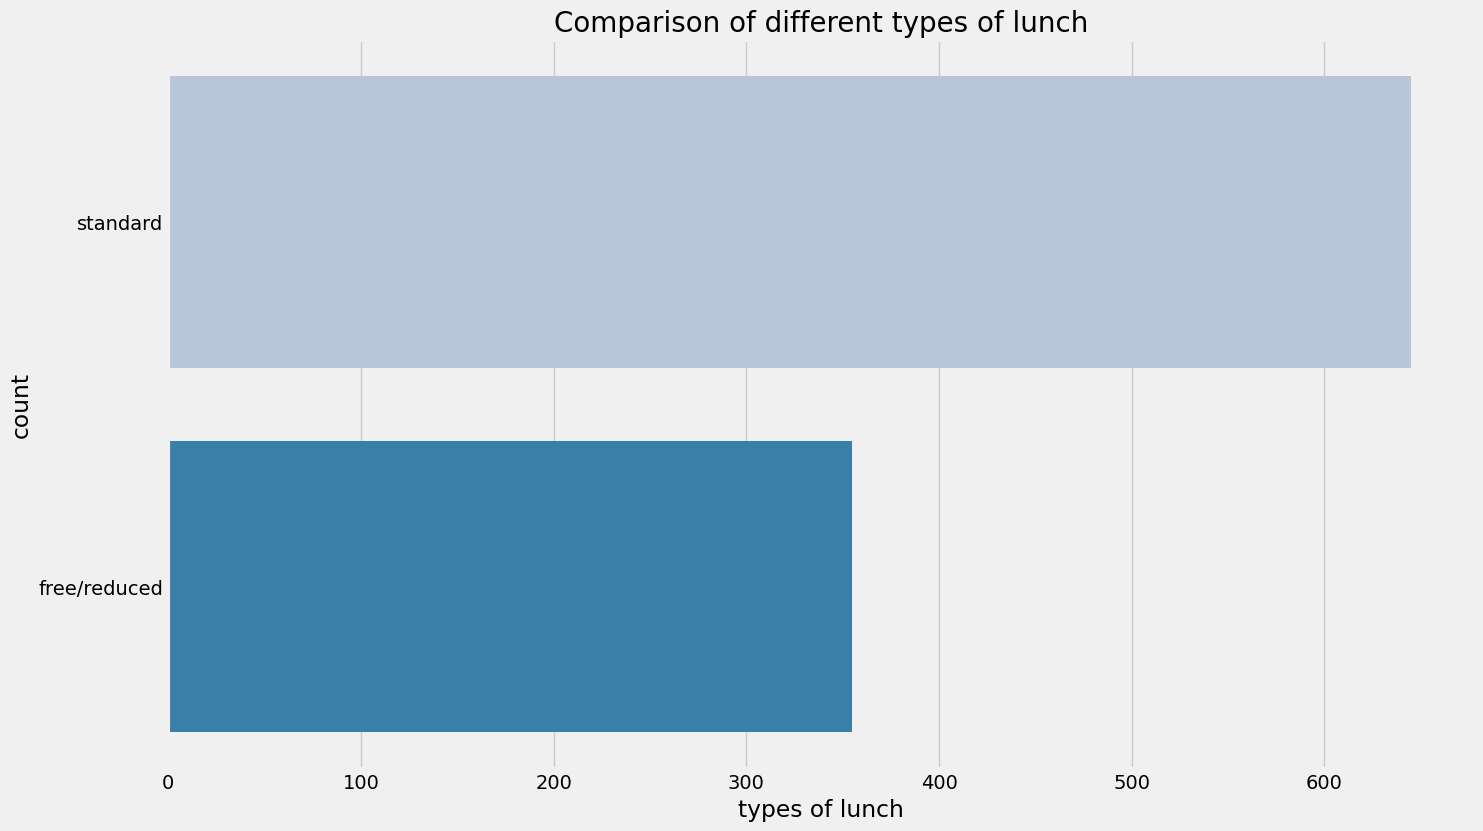

In [38]:
plt.rcParams['figure.figsize'] = (15, 9)

sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

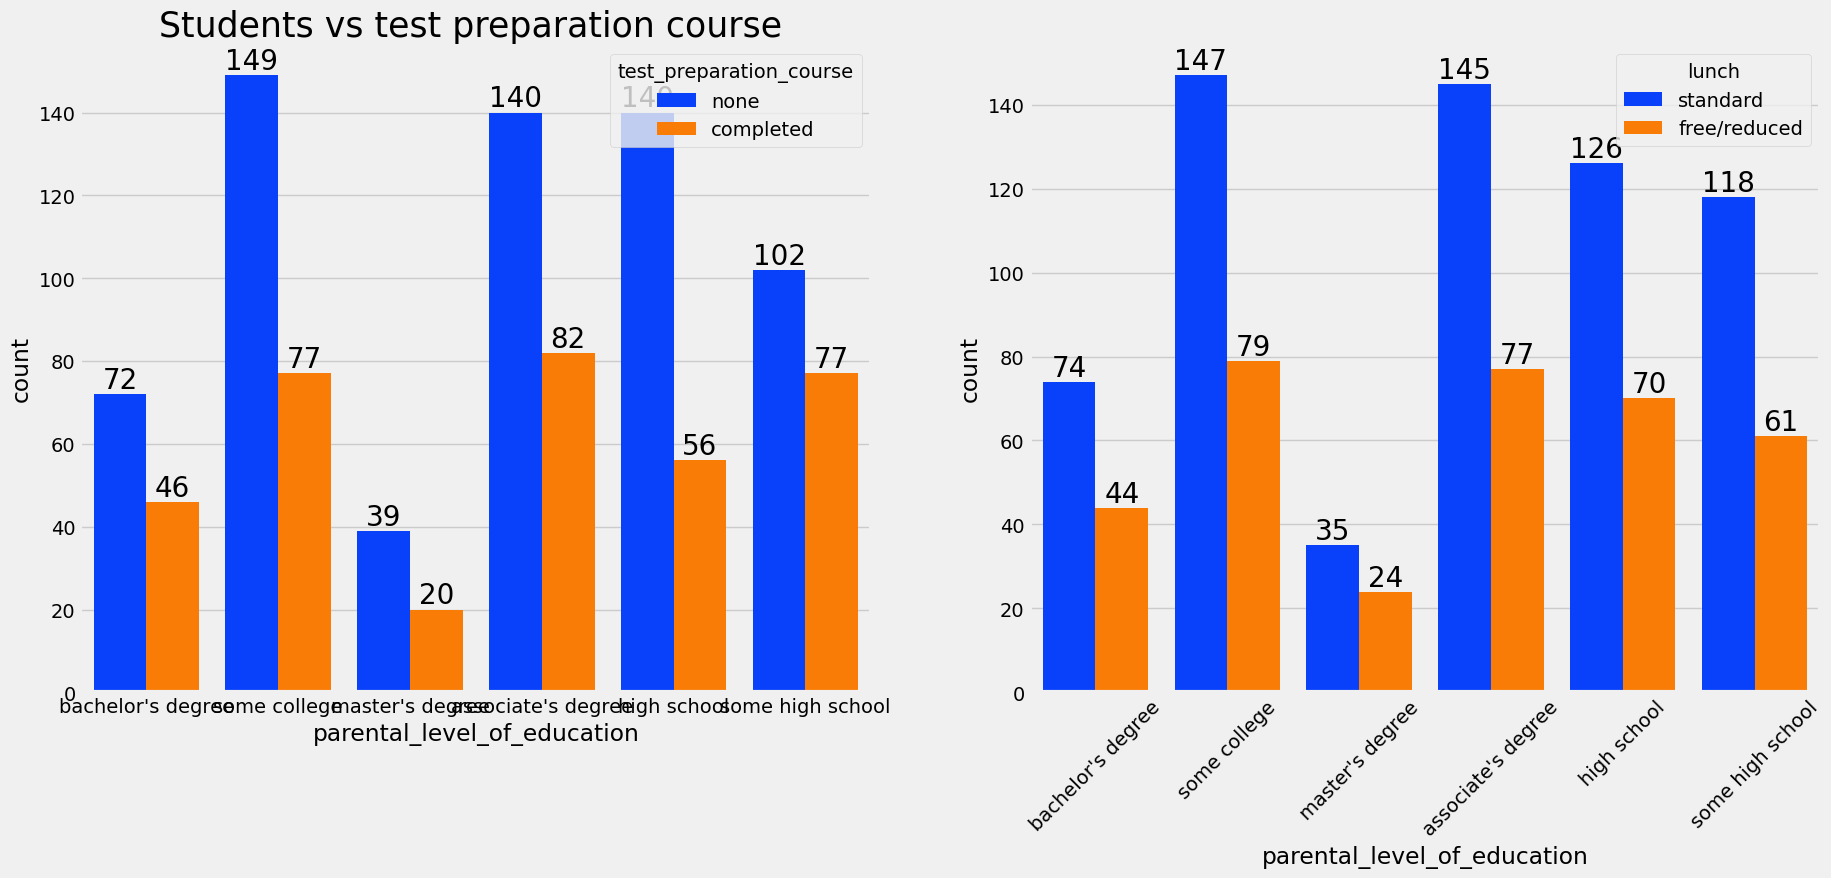

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,8))
plt.xticks(rotation=45)
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

plt.xticks(rotation=45) 
    

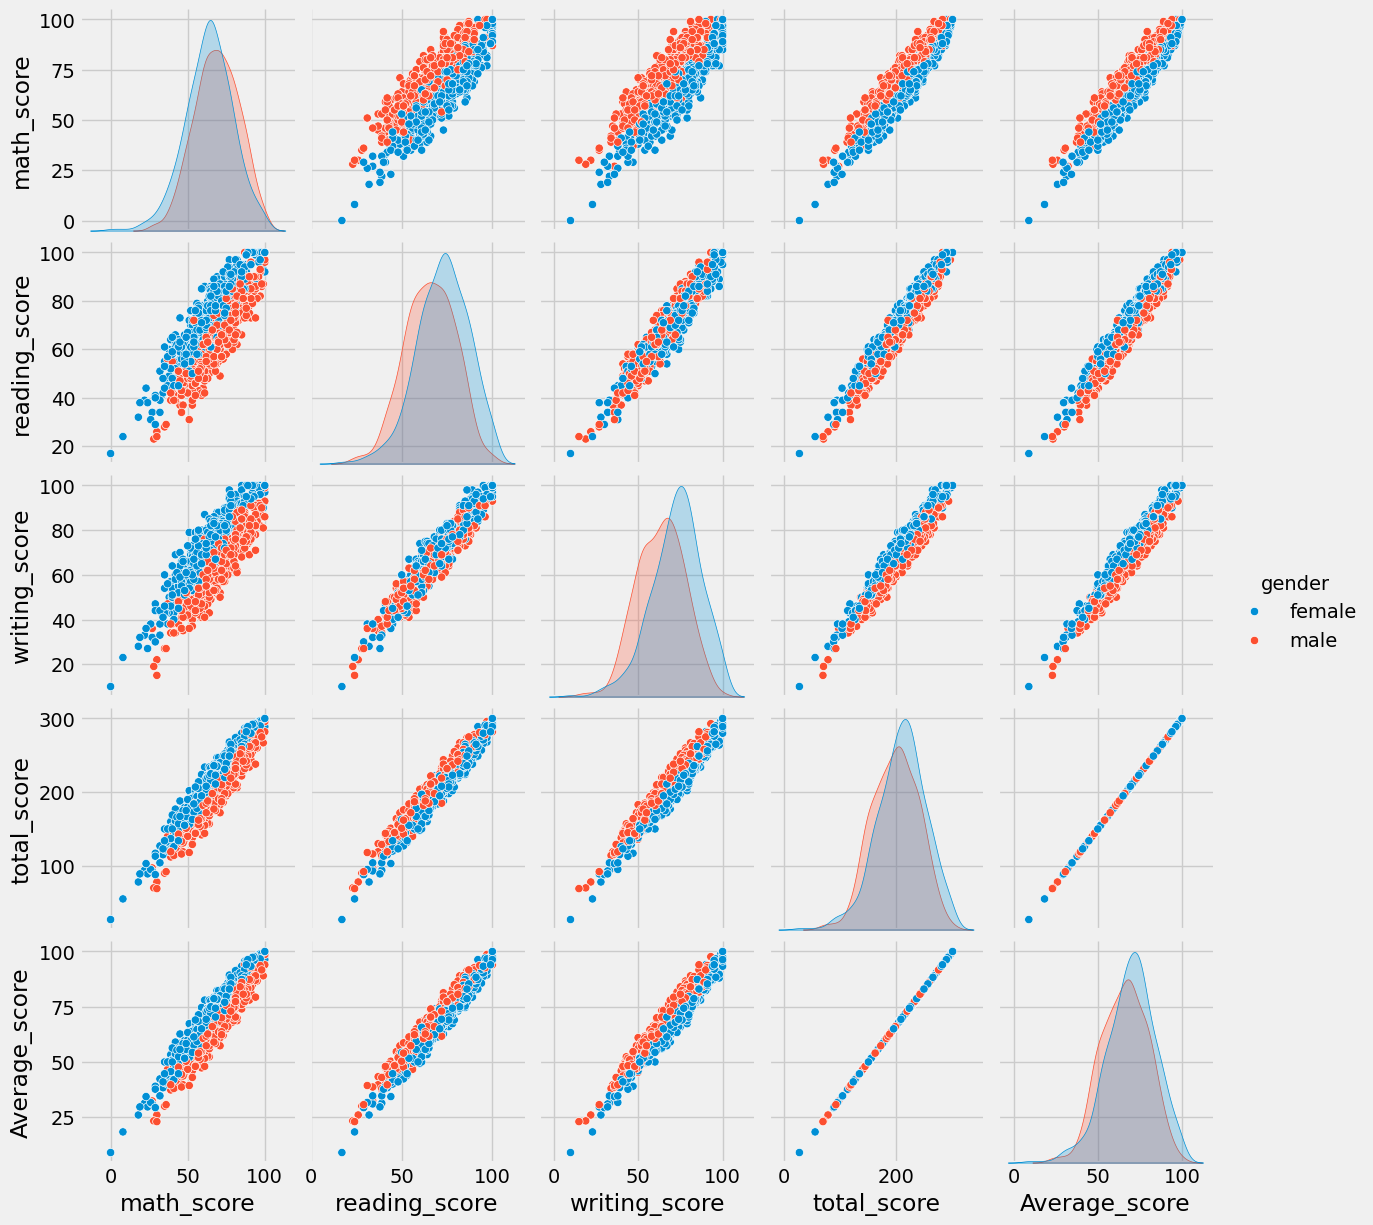

In [44]:
sns.pairplot(df,hue = 'gender')
plt.show()